In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***IMPORT LIBRARIES***

In [2]:
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 5.5 MB/s eta 0:00:00


In [3]:
# Importing NumPy to perform numerical calculations and array manipulation.
import numpy as nmpy

# Importing Pandas to handle data in structured formats such as DataFrames.
import pandas as pnds

# Using Matplotlib's 'pyplot' module to plot and visualize data.
import matplotlib.pyplot as ptlt

# Importing Seaborn to generate more visually pleasing statistical charts.
import seaborn as sbns

# Using SMOTE from unbalanced-learn to handle imbalanced datasets and generate syn,tic examples for , minority class.
from imblearn.over_sampling import SMOTE

# Importing train_test_split to divide , dataset across training and testing sets.
from sklearn.model_selection import train_test_split

# Using RandomForestClassifier to createing a strong ensemble model for classification.
from sklearn.ensemble import RandomForestClassifier

# Importing accuracy_score and classification_report to assess model performance using standard metrics.
from sklearn.metrics import accuracy_score, classification_report

# Importing precision, recall, F1-score, and ROC AUC score for a thorough performance evaluation,
# which is very important in imbalanced classification tasks.
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Importing LabelBinarizer to convert categorical labels to binary format to ensure model compatibility.
from sklearn.preprocessing import LabelBinarizer
# Uses 'SelectKBest' and 'f_classif' from 'sklearn.feature_selection' to perform feature selection with ANOVA F-values.
from sklearn.feature_selection import SelectKBest, f_classif
# Uses 'LabelEncoder' from 'sklearn.preprocessing' to convert categorical labels into numerical values.
from sklearn.preprocessing import LabelEncoder
# Importeing confusion_matrix
from sklearn.metrics import confusion_matrix
#importeing lablbinrize
from sklearn.preprocessing import label_binarize
#importeing Roccurve
from sklearn.metrics import roc_curve, auc

##Loading Dataset

In [4]:
#LoaDiNg  DATAset
Flwmterdf = pnds.read_csv('/content/drive/MyDrive/TotalFeatures-ISCXFlowMeter.csv')

##Exploratory Data Analysis

In [5]:
 # PreviEw , FiRst FEw RoWS
Flwmterdf.head()

,duration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,...,mean_idle,max_idle,std_idle,FFNEPD,Init_Win_bytes_forward,Init_Win_bytes_backward,RRT_samples_clnt,Act_data_pkt_forward,min_seg_size_forward,calss
0,1020586,668,1641,35692,2276876,52,52,679,1390,53.431138,...,0.0,-1,0.0,2,4194240,1853440,1640,668,32,benign
1,80794,1,1,75,124,75,124,75,124,75.000000,...,0.0,-1,0.0,2,0,0,0,1,0,benign
2,998,3,0,187,0,52,-1,83,-1,62.333333,...,0.0,-1,0.0,4,101888,-1,0,3,32,benign
3,189868,9,9,1448,6200,52,52,706,1390,160.888889,...,0.0,-1,0.0,2,4194240,2722560,8,9,32,benign
4,110577,4,6,528,1422,52,52,331,1005,132.000000,...,0.0,-1,0.0,2,155136,31232,5,4,32,benign


In [6]:
 # PRint DataSEt SHApe (RoWS,COluMNS)
Flwmterdf.shape

(631955, 80)

In [7]:
# cHeck uNique vAlues iN , cOlumn
Flwmterdf['calss'].nunique()

3

In [8]:
 # dISplay cOLumn nAmes
Flwmterdf.columns

Index(['duration', 'total_fpackets', 'total_bpackets', 'total_fpktl',
       'total_bpktl', 'min_fpktl', 'min_bpktl', 'max_fpktl', 'max_bpktl',
       'mean_fpktl', 'mean_bpktl', 'std_fpktl', 'std_bpktl', 'total_fiat',
       'total_biat', 'min_fiat', 'min_biat', 'max_fiat', 'max_biat',
       'mean_fiat', 'mean_biat', 'std_fiat', 'std_biat', 'fpsh_cnt',
       'bpsh_cnt', 'furg_cnt', 'burg_cnt', 'total_fhlen', 'total_bhlen',
       'fPktsPerSecond', 'bPktsPerSecond', 'flowPktsPerSecond',
       'flowBytesPerSecond', 'min_flowpktl', 'max_flowpktl', 'mean_flowpktl',
       'std_flowpktl', 'min_flowiat', 'max_flowiat', 'mean_flowiat',
       'std_flowiat', 'flow_fin', 'flow_syn', 'flow_rst', 'flow_psh',
       'flow_ack', 'flow_urg', 'flow_cwr', 'flow_ece', 'downUpRatio',
       'avgPacketSize', 'fAvgSegmentSize', 'fHeaderBytes', 'fAvgBytesPerBulk',
       'fAvgPacketsPerBulk', 'fAvgBulkRate', 'bVarianceDataBytes',
       'bAvgSegmentSize', 'bAvgBytesPerBulk', 'bAvgPacketsPerBulk',
     

In [9]:
# Provides a summary of , DataFrame's structure, including row and column counts, column names, non-null values, data types, and memory utilization.
# Useful for discovering missing data and ensuring that , dataset is correctly prepared prior to analysis.
Flwmterdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631955 entries, 0 to 631954
Data columns (total 80 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration                 631955 non-null  int64  
 1   total_fpackets           631955 non-null  int64  
 2   total_bpackets           631955 non-null  int64  
 3   total_fpktl              631955 non-null  int64  
 4   total_bpktl              631955 non-null  int64  
 5   min_fpktl                631955 non-null  int64  
 6   min_bpktl                631955 non-null  int64  
 7   max_fpktl                631955 non-null  int64  
 8   max_bpktl                631955 non-null  int64  
 9   mean_fpktl               631955 non-null  float64
 10  mean_bpktl               631955 non-null  float64
 11  std_fpktl                631955 non-null  float64
 12  std_bpktl                631955 non-null  float64
 13  total_fiat               631955 non-null  int64  
 14  tota

##Label Encoding

In [10]:
# Initializes a new instance of 'LabelEncoder'.
label_encoder = LabelEncoder()

# Encodes , 'calss' column by fitting and converting it, replacing , original categories labels with numerical codes.
Flwmterdf['calss'] = label_encoder.fit_transform(Flwmterdf['calss'])

# Displays , unique encoded values in , modified 'calss' column to confirm encoding.
print(Flwmterdf['calss'].unique())

[2 1 0]


In [11]:
Flwmterdf.tail()

,duration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,...,mean_idle,max_idle,std_idle,FFNEPD,Init_Win_bytes_forward,Init_Win_bytes_backward,RRT_samples_clnt,Act_data_pkt_forward,min_seg_size_forward,calss
631950,530,1,1,74,334,74,334,74,334,74.00000,...,0.0,-1,0.000000e+00,2,0,0,0,1,0,2
631951,50240627,23,24,4767,6107,52,52,533,855,207.26087,...,9842879.0,9964749,1.196806e+05,2,317952,107008,11,23,32,0
631952,35471450,1,2,52,104,52,52,52,52,52.00000,...,35300000.0,35290631,0.000000e+00,2,3904,88704,1,1,32,1
631953,41713629,12,26,1821,18643,40,40,489,1390,151.75000,...,20200000.0,32711382,1.770000e+07,2,227456,2432,23,12,20,2
631954,50110119,20,23,4130,6043,52,52,533,855,206.50000,...,9873329.4,9906007,4.737363e+04,2,266112,59904,11,20,32,0


In [12]:
# cHeck iF aNY cOLumns hAS mISSing vAlues
Flwmterdf.isnull().sum().max()

np.int64(0)

# Visualizing Distributions: Histograms of the First Five Numerical Features

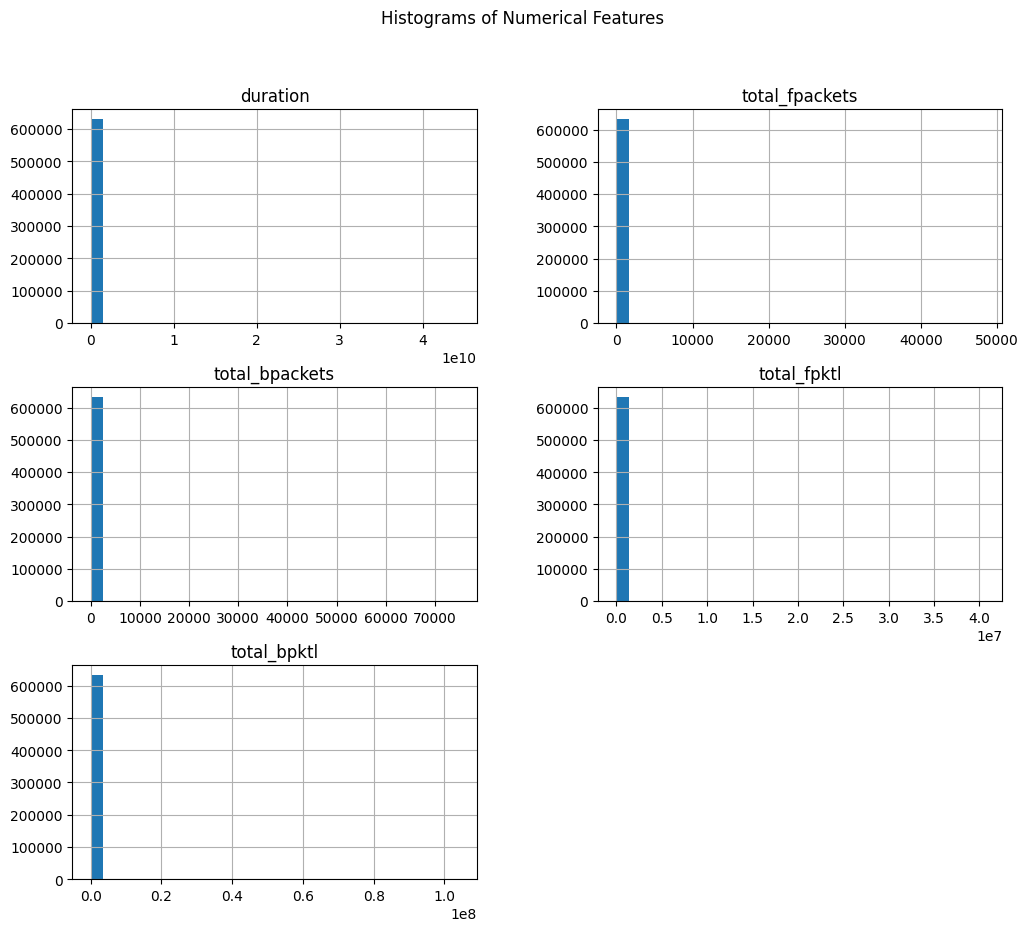

In [13]:
# , DataFrame's first five numerical columns are selected using data type filtering and column slicing.
Flwmterdf.select_dtypes(include=['number']).iloc[:, :5].hist(figsize=(12, 10), bins=30)

# Defines , general title for , group of histograms to provide context.
ptlt.suptitle("Histograms of Numerical Features")

# Displays histograms with Matplotlib.
ptlt.show()

##Check class value count

In [14]:
# Iterates through a list of specific column names, analyzing ,ir contents.
for column in ['burg_cnt', 'furg_cnt', 'flow_urg', 'flow_cwr', 'flow_ece']:

  # Prints a header showing which column's value counts are now displayed.
  print(f"Value counts for {column}:")

  # 'value_counts()' displays , frequency of each unique value in , current column.
  print(Flwmterdf[column].value_counts())

  # Adds a newline after each output block for easier reading in , terminal.
  print("\n")

Value counts for burg_cnt:
burg_cnt
0    631955
Name: count, dtype: int64


Value counts for furg_cnt:
furg_cnt
0    631955
Name: count, dtype: int64


Value counts for flow_urg:
flow_urg
0    631955
Name: count, dtype: int64


Value counts for flow_cwr:
flow_cwr
0    631955
Name: count, dtype: int64


Value counts for flow_ece:
flow_ece
0    631955
Name: count, dtype: int64




##Dropping irrelevant features

In [15]:
# Drop specified features
Flwmterdf = Flwmterdf.drop(['flow_ece', 'flow_cwr', 'flow_urg', 'furg_cnt', 'burg_cnt'], axis=1)

##Correlation Heatmap

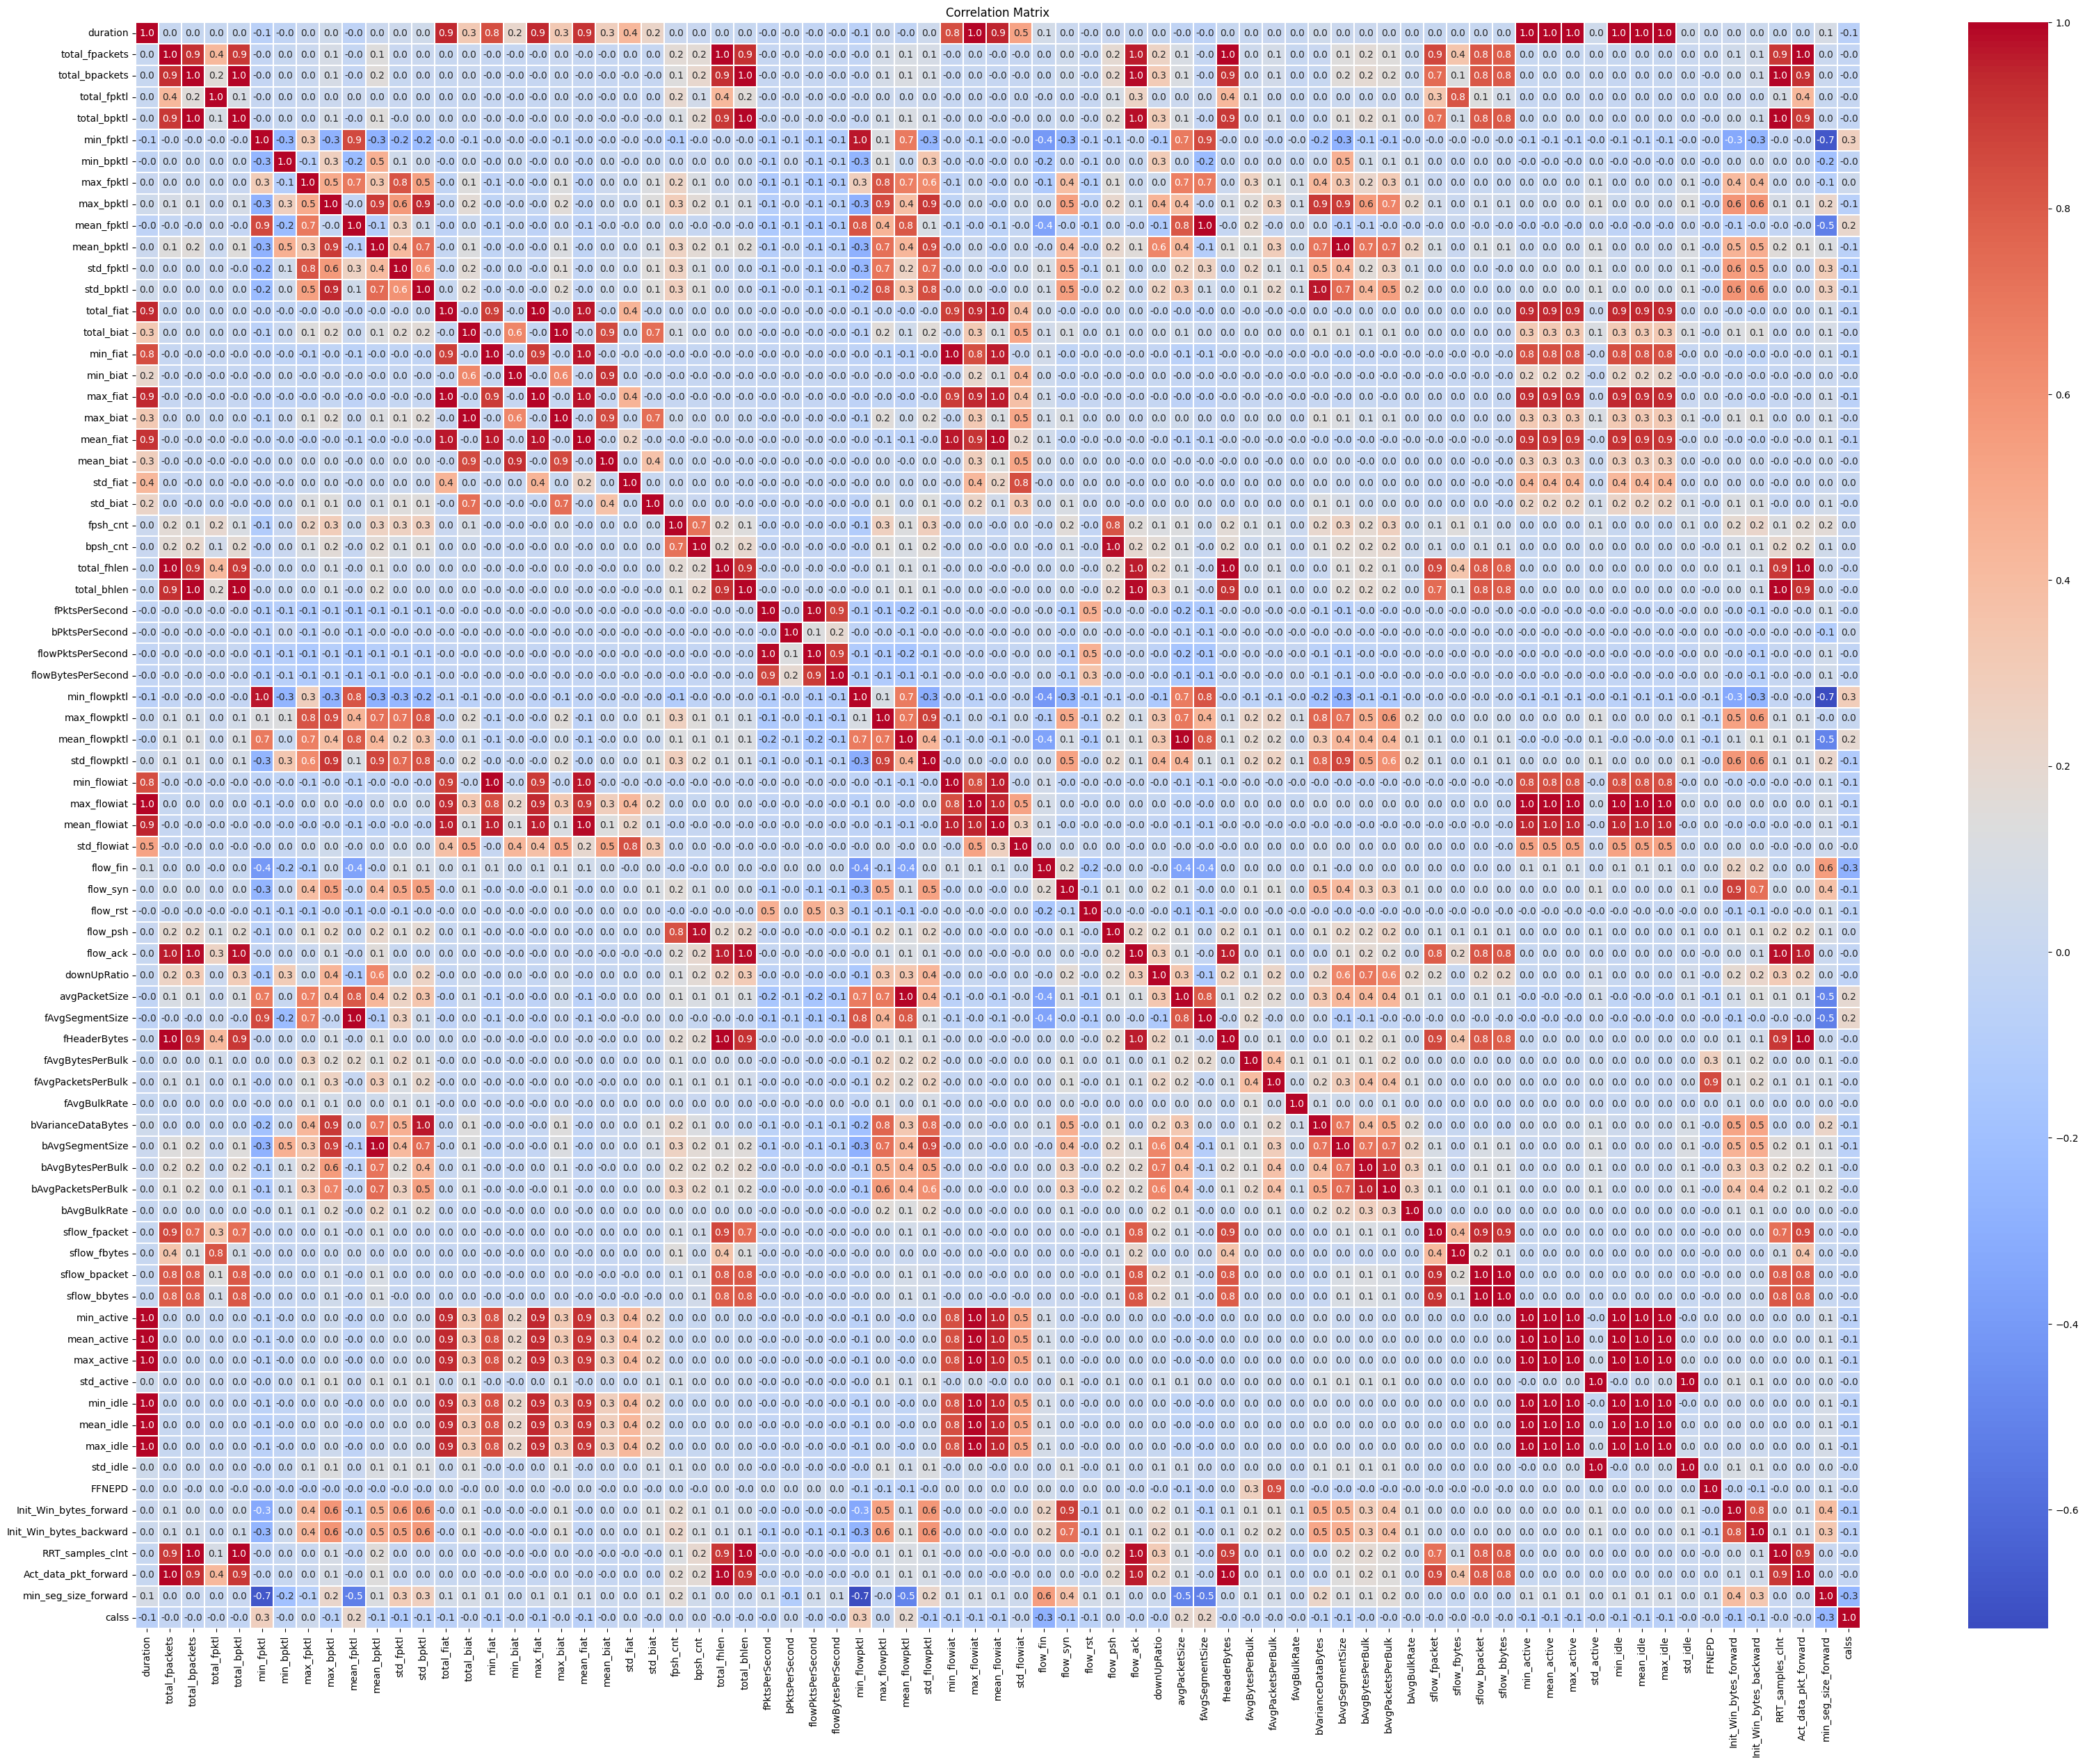

In [16]:
# createings a correlation matrix utilizing only , numeric columns of , DataFrame to find feature correlations.
corr_matrix = Flwmterdf.select_dtypes(include=['number']).corr()

# createings a Matplotlib figure with a large size to clearly display , heatmap.
ptlt.figure(figsize=(40,30))  # Adjust figure size as needed

# To illustrate , correlation matrix, a heatmap is createingd using Seaborn.
sbns.heatmap(corr_matrix,
            # Allows annotation to show correlation coefficients directly on , heatmap.
            annot=True,

            # Visually highlight positive and negative associations using , 'coolwarm' color scheme.
            cmap='coolwarm',

            # To improve clarity, correlation values are formatted to one decimal point.
            fmt=".1f",

            # Increases , gap between cells for better readability.
            linewidths=.20)

# Contextually sets , heatmap's title.
ptlt.title("Correlation Matrix")

# Displays , heat map.
ptlt.show()

##Top 10 correlation featutres


In [17]:
# Defines , target feature for correlation analysis.
target_feature = 'calss'

# Determines , association between all numeric features and , desired target feature.
correlation_with_target = Flwmterdf.corr()[target_feature]

# Sorts , absolute correlation values in descending order to find , strongest associations.
# Identify , top ten features that are most closely connected with , goal, omitting , target feature itself.
top_10_correlated_features = correlation_with_target.abs().sort_values(ascending=False)[1:11]

# Prints , top ten attributes having , highest association to , target variable.
print("Top 10 Correlated Features with Target Feature:")
print(top_10_correlated_features)

Top 10 Correlated Features with Target Feature:
min_flowpktl              0.298014
flow_fin                  0.286175
min_fpktl                 0.271343
min_seg_size_forward      0.258352
mean_fpktl                0.211892
fAvgSegmentSize           0.211892
avgPacketSize             0.192075
mean_flowpktl             0.192075
Init_Win_bytes_forward    0.129425
std_fpktl                 0.123758
Name: calss, dtype: float64


##features importance based on correlation


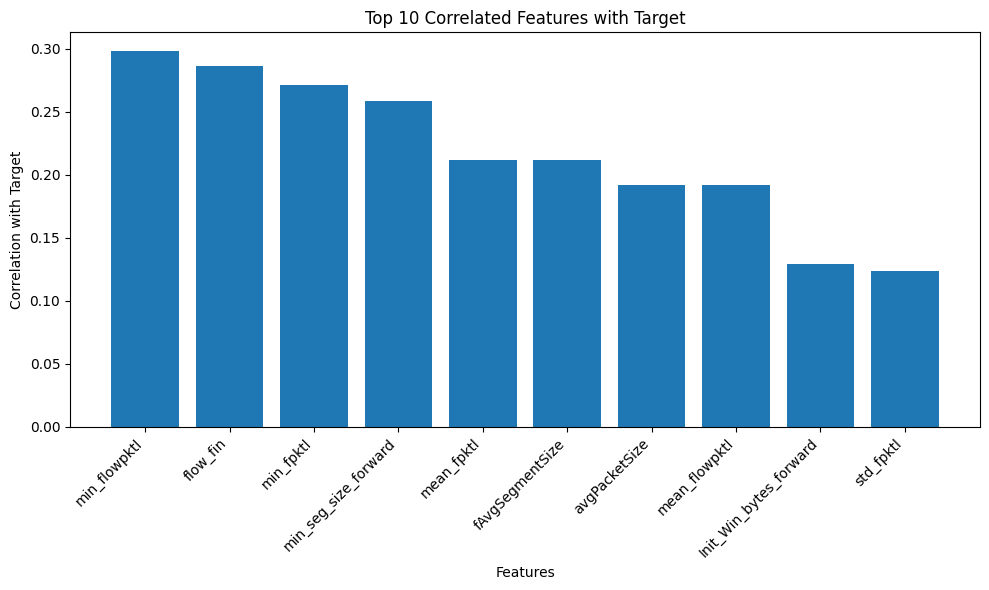

In [18]:
# Determines , figure size to ensure that , plot is readily visible and proportionate.
ptlt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Plots show names on , x-axis and , correlation values on , y-axis.
ptlt.bar(top_10_correlated_features.index, top_10_correlated_features.values)

# Labels , x-axis with , feature name.
ptlt.xlabel("Features")

# Labels , y-axis to indicate correlation strength with , target.
ptlt.ylabel("Correlation with Target")

# Adds a descriptive title to , storyline to provide context.
ptlt.title("Top 10 Correlated Features with Target")

# Rotates and aligns , x-axis labels to improve reading and reduce overlaps.
ptlt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Uses a compact layout to minimize spacing and prevent label clipping.
ptlt.tight_layout()

# Shows , final bar plan.
ptlt.show()

##Target Feature class distrubution

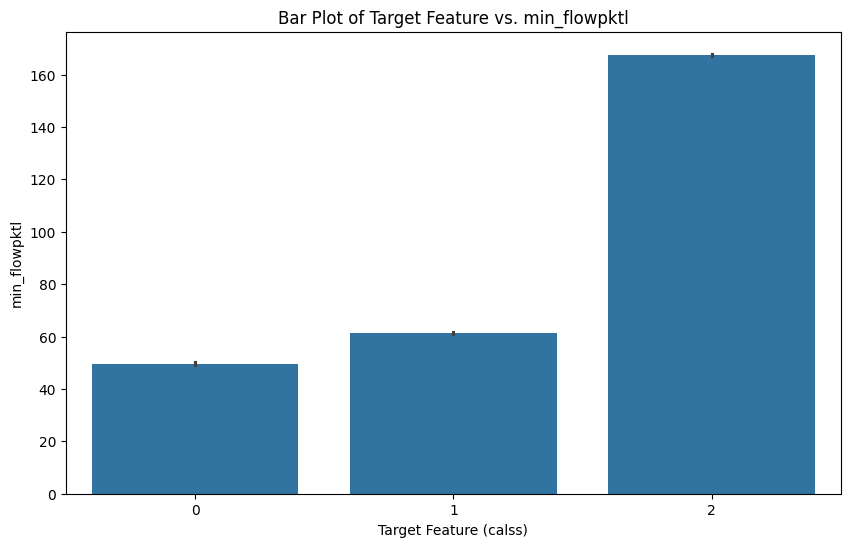

In [19]:
# createings a Matplotlib figure with specific dimensions for easy visualization.
ptlt.figure(figsize=(10, 6))

# Uses Seaborn's barplot to show , relationship between , target feature ('calss') and , 'min_flowpktl' feature.
sbns.barplot(x='calss', y='min_flowpktl', data=Flwmterdf)

# Changes , x-axis label to reflect , target variable.
ptlt.xlabel('Target Feature (calss)')

# Labels , y-axis to reflect , values of 'min_flowpktl'.
ptlt.ylabel('min_flowpktl')

# Adds a title to , storyline to describe , relationship being represented.
ptlt.title('Bar Plot of Target Feature vs. min_flowpktl')

# Displays a bar plot.
ptlt.show()

# *Initializing Target Feature*

In [20]:
# Separates , feature variables by removing , target column 'calss' from , DataFrame and renaming it 'X'.
X = Flwmterdf.drop('calss', axis=1)

# Extracts , target variable 'calss' and assigns it to 'y' for model training purposes.
y = Flwmterdf['calss']

##Feature Selecting

In [21]:
# Initializes , 'SelectKBest' object, which selects , top 50 features based on statistical relevance to , target variable.
selector = SelectKBest(f_classif, k=50)

# Use , selector with , feature matrix 'X' and target 'y' to retrieve , altered feature set 'X_new'.
X_new = selector.fit_transform(X, y)

# Returns , indices of , features picked by , procedure.
selected_feature_indices = selector.get_support(indices=True)

# Uses , indices to retrieve , matching feature names from , original dataset.
selected_features = X.columns[selected_feature_indices]

# Prints , names of , selected features to confirm , selection results.
print("Selected Features:")
print(selected_features)

# Generates a new DataFrame 'X_selected' with only , selected top features for additional investigation or modeling.
X_selected = X[selected_features]

Selected Features:
Index(['duration', 'total_bpktl', 'min_fpktl', 'min_bpktl', 'max_fpktl',
       'max_bpktl', 'mean_fpktl', 'mean_bpktl', 'std_fpktl', 'std_bpktl',
       'total_fiat', 'min_fiat', 'max_fiat', 'mean_fiat', 'std_biat',
       'fpsh_cnt', 'bpsh_cnt', 'fPktsPerSecond', 'flowPktsPerSecond',
       'flowBytesPerSecond', 'min_flowpktl', 'mean_flowpktl', 'std_flowpktl',
       'min_flowiat', 'max_flowiat', 'mean_flowiat', 'flow_fin', 'flow_syn',
       'flow_rst', 'flow_psh', 'flow_ack', 'downUpRatio', 'avgPacketSize',
       'fAvgSegmentSize', 'fAvgBytesPerBulk', 'bVarianceDataBytes',
       'bAvgSegmentSize', 'bAvgBytesPerBulk', 'min_active', 'mean_active',
       'max_active', 'std_active', 'min_idle', 'mean_idle', 'max_idle',
       'std_idle', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
       'RRT_samples_clnt', 'min_seg_size_forward'],
      dtype='object')


##Features importance


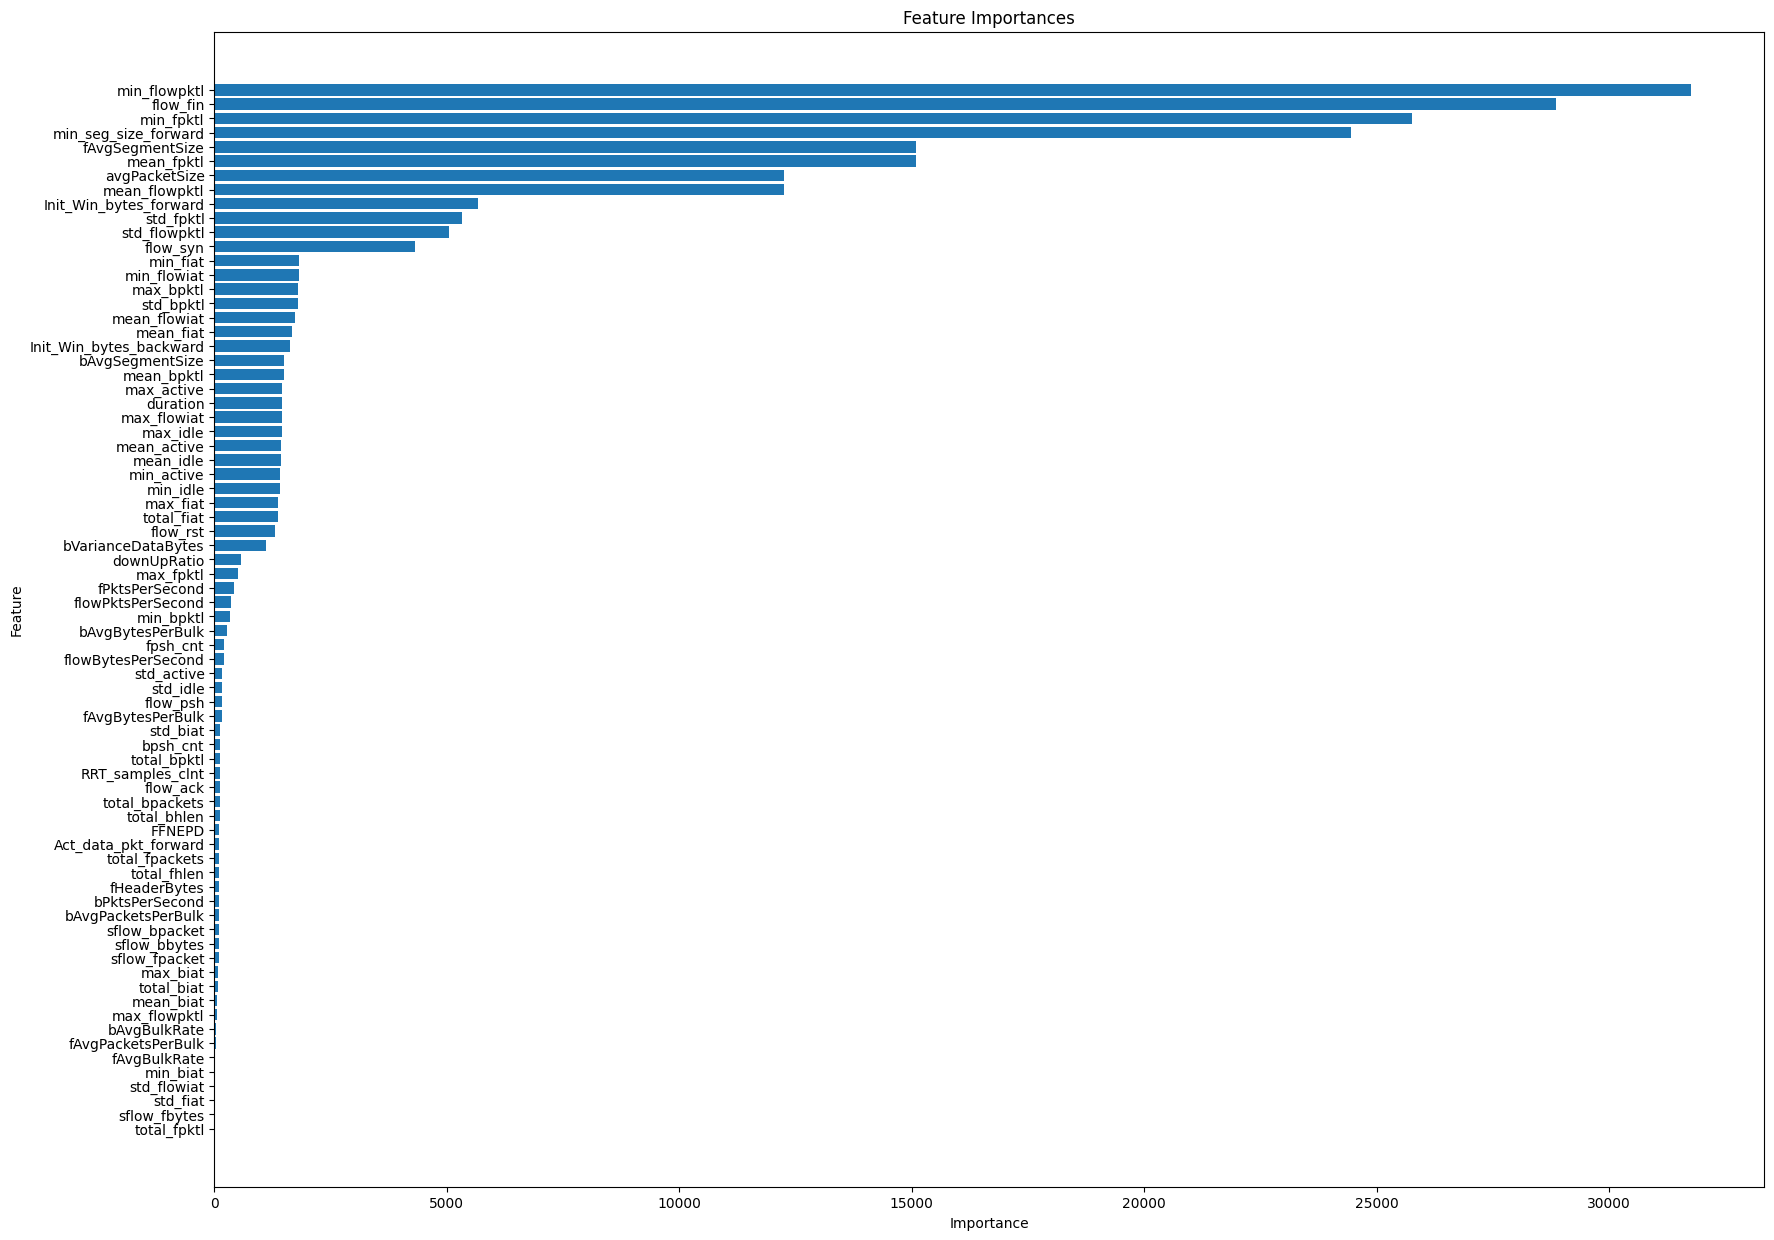

In [22]:
# Returns , ANOVA F-scores (importance values) calculated using , 'SelectKBest' selection.
feature_importances = selector.scores_

# Generates a DataFrame that pairs feature names with ,ir respective significance scores.
feature_importance_Flwmterdf = pnds.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sorts , DataFrame in descending order of relevance, prioritizing , most relevant attributes.
feature_importance_Flwmterdf = feature_importance_Flwmterdf.sort_values(by='Importance', ascending=False)

# Sets up a horizontal bar plot with a specific figure size for clarity.
ptlt.figure(figsize=(20, 15))

# Plots , importance scores against , feature names.
ptlt.barh(feature_importance_Flwmterdf['Feature'], feature_importance_Flwmterdf['Importance'])

# Labels , x-axis with feature significance scores.
ptlt.xlabel('Importance')

# Labels , y-axis with feature names.
ptlt.ylabel('Feature')

# Include a title to help contextualize , plot.
ptlt.title('Feature Importances')

# Inverts , y-axis, displaying , most relevant characteristics at , top of , plot.
ptlt.gca().invert_yaxis()

# Shows , final feature significance visualization.
ptlt.show()

##Drop least important features

In [23]:
# Defines a list of feature names to be removed from , dataset.
columns_to_drop = ['total_fpktl', 'sflow_fbytes', 'std_fiat', 'std_flowiat', 'min_biat', 'fAvgBulkRate', 'max_flowpktl', 'fAvgBulkRate', 'mean_biat', 'total_biat']

# Retrieves , DataFrame's existing column names to facilitate safe column operations.
existing_columns = Flwmterdf.columns

# To avoid problems, filter and drop only columns from , list that are genuinely present in , DataFrame.
Flwmterdf = Flwmterdf.drop(columns=[col for col in columns_to_drop if col in existing_columns], axis=1)

##Checking class imbalance

calss
2    471597
1    155613
0      4745
Name: count, dtype: int64
calss
2    74.625092
1    24.624063
0     0.750845
Name: count, dtype: float64


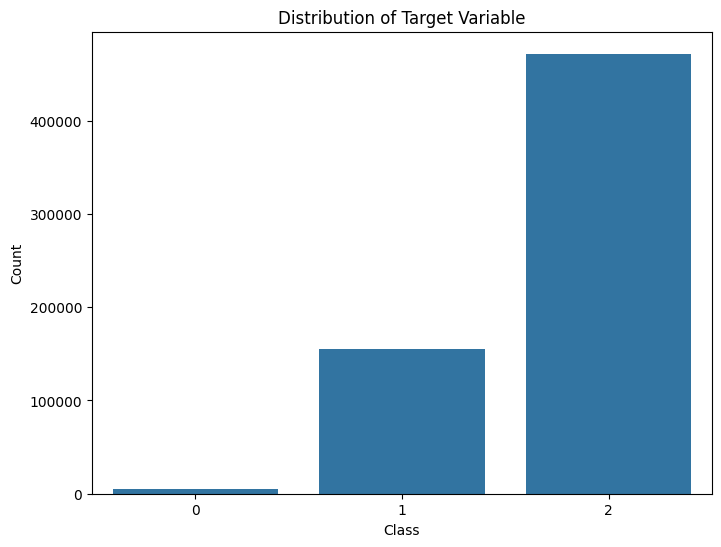

, dataset appears to be imbalanced.


In [24]:
# Assigns , target variable name to a variable for future use and validation.
target_variable = 'calss'  # Replace with your actual target variable column name

# To avoid runtime issues, this function checks to see if , target variable exists in , data frame.
if target_variable in Flwmterdf.columns:

  # If present, calculates and prints , count of each class in , target variable for preliminary inspection.
  class_counts = Flwmterdf[target_variable].value_counts()
  print(class_counts)

  # Determines , percentage distribution of each class based on , total number of records.
  class_percentages = class_counts / len(Flwmterdf) * 100
  print(class_percentages)

  # createings a figure for visualizing , class distribution.
  ptlt.figure(figsize=(8, 6))

  # Uses Seaborn's 'countplot' to show how , classes are spread inside , target variable.
  sbns.countplot(x=target_variable, data=Flwmterdf)

  # Adds title and axis labels to improve clarity and context.
  ptlt.title('Distribution of Target Variable')
  #ploteing xlbel
  ptlt.xlabel('Class')
  #ploteing Ylbel
  ptlt.ylabel('Count')

  # Displays a count plot.
  ptlt.show()

  # If ,re are multiple classes, determine , percentage difference between , most and least frequent classes.
  if len(class_percentages) > 1:
    if (class_percentages.max() - class_percentages.min()) > 20:
      # Prints a message indicating if , class distribution is unequal or roughly equal.
      print(", dataset appears to be imbalanced.")
    else:
      print(", dataset appears to be relatively balanced.")
else:
  # If , target column is not found, notifies , user accordingly.
  print("Target variable not found in , dataframe.")

##SMOTE (for class balancing)

In [25]:
# APPly SMOTE to bAlAnce , dAtAset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# CHEck , clASs dIStribution aFTer applyINg SMOTE
print(y_resampled.value_counts())

calss
2    471597
1    471597
0    471597
Name: count, dtype: int64


##Class Balance


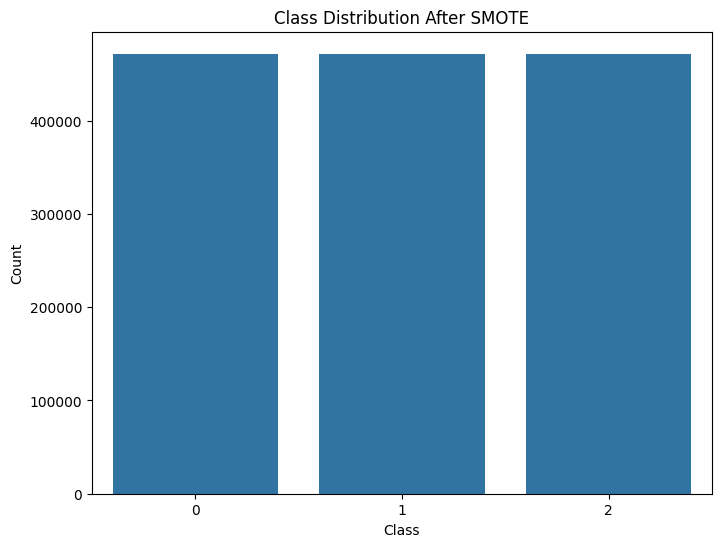

In [26]:
class_counts = y_resampled.value_counts()

# createing a bar plot for , class distribution
ptlt.figure(figsize=(8, 6))
sbns.countplot(x=y_resampled)
#ploteing Tittle
ptlt.title('Class Distribution After SMOTE')
#ploteing Xlbel
ptlt.xlabel('Class')
#ploteing Ylbel
ptlt.ylabel('Count')
#desplyeing
ptlt.show()

# Calculate , percentage of each class after SMOTE
class_percentages = class_counts / len(y_resampled) * 100




***Data Spliting***

In [27]:
#sPLit dATA iNTO tRAining aND tESt sETs
Flwmterxtr, Flwmterxtst, Flwmterytrn, Flwmterytst = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [28]:

Flwmterxtr.shape

(1131832, 50)

In [29]:
Flwmterxtst.shape

(282959, 50)

***RANDOM FOREST MODEL***

In [30]:
# createing a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=500,max_depth=25,n_jobs=-1,random_state=42)

# Traineing , modal
rf_classifier.fit(Flwmterxtr, Flwmterytrn)

RandomForestClassifier(max_depth=25, n_estimators=500, n_jobs=-1,
                       random_state=42)

# ***RANDOM FOREST TRAINING RESULT***


In [31]:
print(f"Training Accuracy: {rf_classifier.score(Flwmterxtr, Flwmterytrn)}")

# Make predictions on training set (Flwmterxtr) before calculating metrics
Flwmterytrn_pred = rf_classifier.predict(Flwmterxtr)

# Now use Flwmterytrn_pred (predictions on , training set) for training metrics
# Call , precision_score function from sklearn.metrics
#prnteing precsion
print("Training Precision Score:", precision_score(Flwmterytrn, Flwmterytrn_pred, average='weighted'))
#prnteing  Recal
print("Training Recall Score:", recall_score(Flwmterytrn, Flwmterytrn_pred, average='weighted'))
#prnteing FScre
print("Training F1 Score:", f1_score(Flwmterytrn, Flwmterytrn_pred, average='weighted'))

Training Accuracy: 0.9654992967154136
 Training Precision Score: 0.9657448219777994
Training Recall Score: 0.9654992967154136
Training F1 Score: 0.9655048063251535


##Classification Report


In [32]:
print("Classification Report(Training):")
# Generate classification report using Flwmterytst and y_pred (predictions on test set)
print(classification_report(Flwmterytrn, Flwmterytrn_pred))

Classification Report(Training):
              precision    recall  f1-score   support

           0       0.98      0.97      0.98    377075
           1       0.95      0.98      0.96    377399
           2       0.97      0.95      0.96    377358

    accuracy                           0.97   1131832
   macro avg       0.97      0.97      0.97   1131832
weighted avg       0.97      0.97      0.97   1131832



##Confusion Matrix

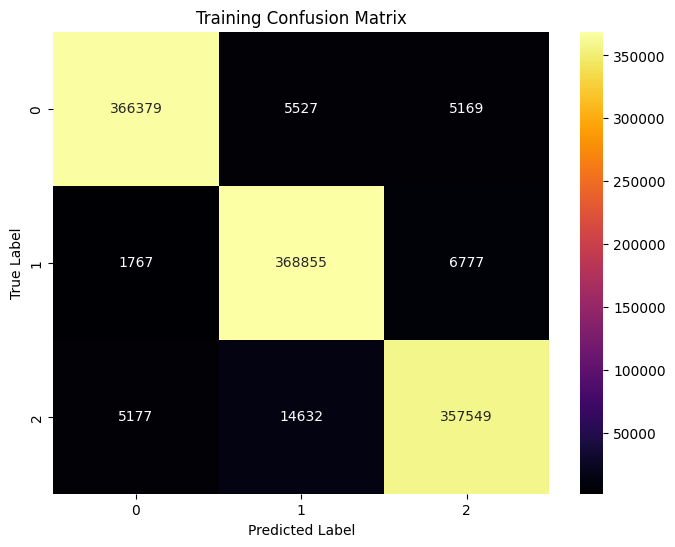

In [33]:
# Calculate , confusion matrix for training data
cm_train = confusion_matrix(Flwmterytrn, Flwmterytrn_pred)

# Plot , confusion matrix as a heatmap for training data
ptlt.figure(figsize=(8, 6))
sbns.heatmap(cm_train, annot=True, fmt='d', cmap='inferno',
            xticklabels=rf_classifier.classes_,
            yticklabels=rf_classifier.classes_)
#ploteing tittle
ptlt.title('Training Confusion Matrix')
#ploteing Xlbel
ptlt.xlabel('Predicted Label')
#ploteing Ylbel
ptlt.ylabel('True Label')
#desplaying
ptlt.show()

##Roc Curve

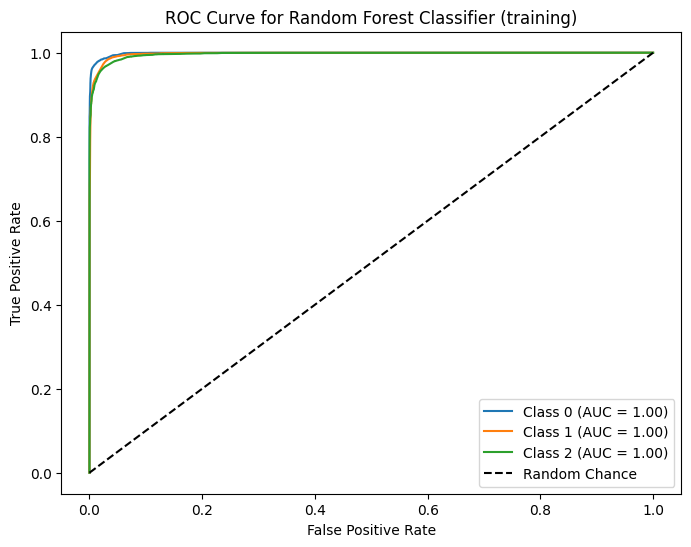

In [34]:
# Get class probabilities instead of predicted labels
y_pred_proba = rf_classifier.predict_proba(Flwmterxtr)  # (num_samples, num_classes)

# Binarize , output labels for multi-class ROC
Flwmterytst_bin = label_binarize(Flwmterytrn, classes=nmpy.unique(Flwmterytrn))
n_classes = Flwmterytst_bin.shape[1]

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Flwmterytst_bin[:, i], y_pred_proba[:, i])  # Use probabilities
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
ptlt.figure(figsize=(8, 6))
for i in range(n_classes):
    ptlt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot random chance line
ptlt.plot([0, 1], [0, 1], 'k--', label="Random Chance")

#ploteing Xlbel
ptlt.xlabel('False Positive Rate')
#ploteing Ylbel
ptlt.ylabel('True Positive Rate')
#ploteing Tittle
ptlt.title('ROC Curve for Random Forest Classifier (training)')
#ploteing lgend
ptlt.legend(loc='lower right')
#desplaying Result
ptlt.show()

##RandomForest Test Result

In [35]:
# Make predictions on , test set (labels instead of probabilities)
y_pred = rf_classifier.predict(Flwmterxtst)

# Calculate ROC AUC score using probabilities and one-hot encoded true labels
print(f"testing Accuracy: {rf_classifier.score(Flwmterxtst, Flwmterytst)}")
#prnting presion
print("testing Precision:", precision_score(Flwmterytst, y_pred, average='weighted'))
#prnting Recal
print("testing Recall:", recall_score(Flwmterytst, y_pred, average='weighted'))
#prnting fscore
print("testing F1 Score:", f1_score(Flwmterytst, y_pred, average='weighted'))

testing Accuracy: 0.9438823292420456
testing Precision: 0.944150911464127
testing Recall: 0.9438823292420456
testing F1 Score: 0.9438596702263807


##Classification Report

In [36]:
print("Classification Report of testing results:")
# Generate classification report using Flwmterytst and y_pred (predicted labels)
print(classification_report(Flwmterytst, y_pred))

Classification Report of testing results:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     94522
           1       0.92      0.95      0.94     94198
           2       0.94      0.92      0.93     94239

    accuracy                           0.94    282959
   macro avg       0.94      0.94      0.94    282959
weighted avg       0.94      0.94      0.94    282959



##Confusion Matrix

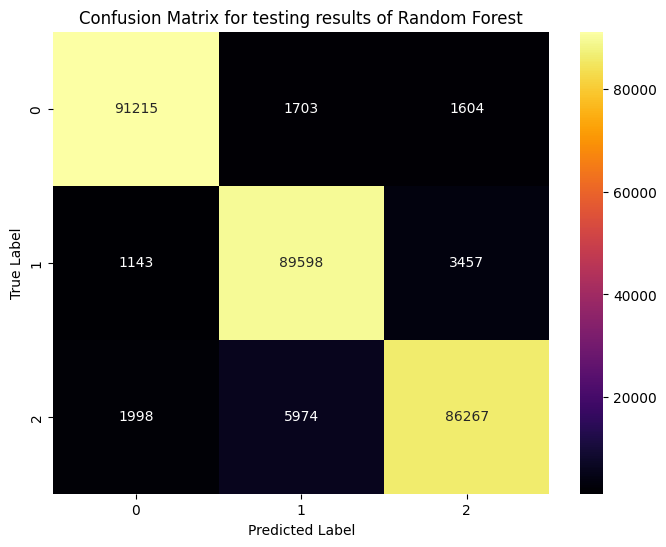

In [37]:
# Calculate , confusion matrix
# Use y_pred (predicted labels) instead of y_pred_proba (probabilities)
cm = confusion_matrix(Flwmterytst, y_pred)

# Plot , confusion matrix as a heatmap
ptlt.figure(figsize=(8, 6))
sbns.heatmap(cm, annot=True, fmt='d', cmap='inferno',
            xticklabels=rf_classifier.classes_,
            yticklabels=rf_classifier.classes_)
#ploteing Tittle
ptlt.title('Confusion Matrix for testing results of Random Forest')
#ploteing Xlbel
ptlt.xlabel('Predicted Label')
#ploteing Ylbel
ptlt.ylabel('True Label')
#displying grph
ptlt.show()

##Roc curve


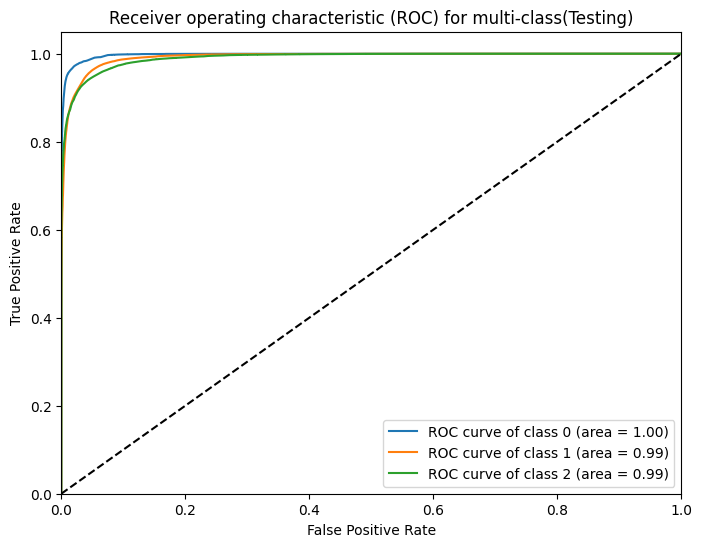

In [38]:
# Binarize , output
Flwmterytst_bin = label_binarize(Flwmterytst, classes=list(rf_classifier.classes_))
n_classes = Flwmterytst_bin.shape[1]

# Get predicted probabilities for the test set
y_pred_proba_test = rf_classifier.predict_proba(Flwmterxtst) # This line is added

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    # Use y_pred_proba_test instead of y_pred_proba
    fpr[i], tpr[i], _ = roc_curve(Flwmterytst_bin[:, i], y_pred_proba_test[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Flwmterytst_bin.ravel(), y_pred_proba_test.ravel()) # Use y_pred_proba_test instead of y_pred_proba
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class
ptlt.figure(figsize=(8, 6))
for i in range(n_classes):
    ptlt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(rf_classifier.classes_[i], roc_auc[i]))


# Draws a dashed diagonal line from (0,1) to (1,0) to depict , ROC curve of a random classifier.
ptlt.plot([0, 1], [0, 1], 'k--')

# Adjusts , x-axis boundaries from 0.0 to 1.0.
ptlt.xlim([0.0, 1.0])

# Changes , y-axis limits from 0.0 to 1.05, providing some more room above , top value.
ptlt.ylim([0.0, 1.05])

# Labels , x-axis with "False Positive Rate".
ptlt.xlabel('False Positive Rate')

# Labels , y-axis with "True Positive Rate".
ptlt.ylabel('True Positive Rate')

# Adds a title to , plot to indicate that it is a ROC curve for a multiclass classification task.
ptlt.title('Receiver operating characteristic (ROC) for multi-class(Testing)')

# Displays , legend in , plot's lower right corner.
ptlt.legend(loc="lower right")

# Renders and displays
ptlt.show()

Xgboost classifier


In [39]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.7/291.7 MB 3.7 MB/s eta 0:00:00


In [40]:
import xgboost as xgb

In [41]:
# Sets up an XGBoost classifier for multi-class classification with the 'multi:sigmoid' objective,
# specifying the maximum tree depth, number of classes, and a set random seed for reproducibility.
xgb_classifier = xgb.XGBClassifier(objective='multi:sigmoid', max_depth=30, num_class=len(nmpy.unique(Flwmterytrn)), random_state=42)

# Trains the XGBoost model with the training features and labels.
xgb_classifier.fit(Flwmterxtr, Flwmterytrn)

# Makes predictions using the trained model on the test feature set.
y_pred_xgb = xgb_classifier.predict(Flwmterxtst)

# Calculates the model's accuracy by comparing predicted labels to actual test labels.
accuracy_xgb = accuracy_score(Flwmterytst, y_pred_xgb)

Training Result

In [42]:
# Make predictions on , training set
Flwmterytrn_pred = xgb_classifier.predict(Flwmterxtr)
#prnteing acuracy
print(f"Training Accuracy: {xgb_classifier.score(Flwmterxtr, Flwmterytrn)}")
#prnteing Prcision
print("Training Precision:", precision_score(Flwmterytrn, Flwmterytrn_pred, average='weighted'))
#prnteing traning Recal
print("Training Recall:", recall_score(Flwmterytrn, Flwmterytrn_pred, average='weighted'))
#prnteing traning Fscore
print("Training F1 Score:", f1_score(Flwmterytrn, Flwmterytrn_pred, average='weighted'))

Training Accuracy: 0.9586396214279151
Training Precision: 0.9588229176332478
Training Recall: 0.9586396214279151
Training F1 Score: 0.9586610574575659


##Classification Report

In [43]:
print("Classification Report of training results:")
#Prnting Classifction Rpert
print(classification_report(Flwmterytrn, Flwmterytrn_pred))

Classification Report of training results:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97    377075
           1       0.94      0.97      0.95    377399
           2       0.96      0.94      0.95    377358

    accuracy                           0.96   1131832
   macro avg       0.96      0.96      0.96   1131832
weighted avg       0.96      0.96      0.96   1131832



##Confusion Matrix

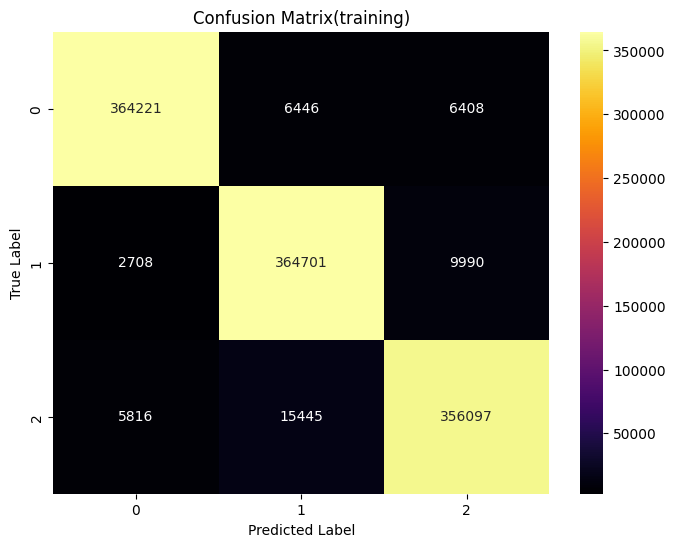

In [44]:
# Calculate , confusion matrix
cm = confusion_matrix(Flwmterytrn, Flwmterytrn_pred)

# Plot , confusion matrix as a heatmap
ptlt.figure(figsize=(8, 6))
sbns.heatmap(cm, annot=True, fmt='d', cmap='inferno',
            xticklabels=rf_classifier.classes_,
            yticklabels=rf_classifier.classes_)
#ploteing Tittle
ptlt.title('Confusion Matrix(training)')
#ploteing Xlbel
ptlt.xlabel('Predicted Label')
#ploteing Ylbel
ptlt.ylabel('True Label')
#desplaying grph
ptlt.show()

##ROC Curve

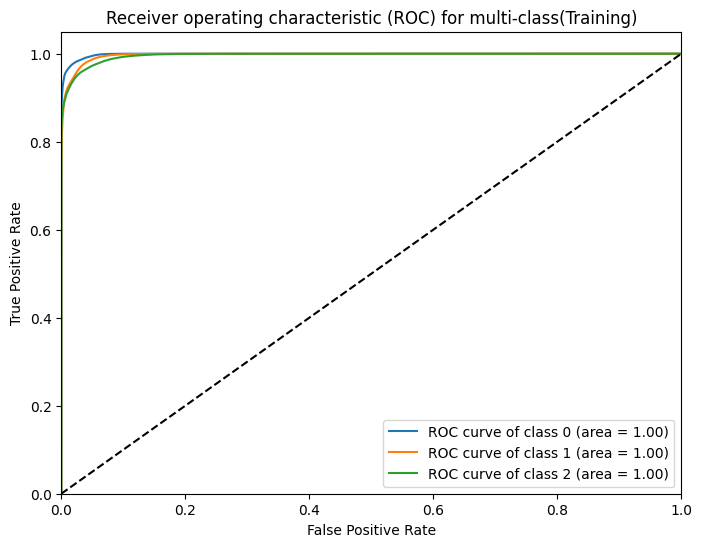

In [45]:
# Using , one-vs-rest technique, , true labels are converted to a binary representation suited for multi-class ROC analysis.

Flwmterytrn_bin = label_binarize(Flwmterytrn, classes=list(xgb_classifier.classes_)) #Corrected to align with xgboost


# Using , binarized label matrix, it determines , number of unique classes in , dataset.
n_classes = Flwmterytrn_bin.shape[1]

# createings dictionaries to record , False Positive Rate (FPR), True Positive Rate (TPR), and Area Under , Curve (AUC) data for each class.
fpr = dict()
tpr = dict()
roc_auc = dict()

# Get predicted probabilities for the test set using xgb_classifier
y_pred_proba_xgb = xgb_classifier.predict_proba(Flwmterxtr)


# Iterates over each class, computing , ROC curve and related AUC by comparing , binarized true labels to , predicted probabilities.
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Flwmterytrn_bin[:, i], y_pred_proba_xgb[:, i]) # Corrected to use xgb_classifier predictions
    roc_auc[i] = auc(fpr[i], tpr[i])

# Generates , micro-average ROC curve and AUC, which combine contributions from all classes by treating each element of , label indicator matrix as a binary prediction.
fpr["micro"], tpr["micro"], _ = roc_curve(Flwmterytrn_bin.ravel(), y_pred_proba_xgb.ravel()) # Corrected to use xgb_classifier predictions
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# createings a new figure for plotting , ROC curves at , specified size.
ptlt.figure(figsize=(8, 6))

# Charts , ROC curve for each class, along with its AUC value, and labels each line effectively.
for i in range(n_classes):
    ptlt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(xgb_classifier.classes_[i], roc_auc[i]))  # Corrected to use xgb_classifier classes

# Draws a dashed diagonal line illustrating a random classifier's ROC curve for purposes of reference.
ptlt.plot([0, 1], [0, 1], 'k--')

# Sets , boundaries for , x and y axes to , typical ROC range.
ptlt.xlim([0.0, 1.0])
#ploting Ylm
ptlt.ylim([0.0, 1.05])

# Labels , axes and createings a title that describes , plot's nature.
ptlt.xlabel('False Positive Rate')
#ploteing Ylbl
ptlt.ylabel('True Positive Rate')
#ploteing Tittle
ptlt.title('Receiver operating characteristic (ROC) for multi-class(Training)')

# , legend in , lower right corner identifies each class's ROC curve.
ptlt.legend(loc="lower right")

# , final ROC plot visualizes , classifier's performance across all classes.
ptlt.show()

##Xgboost Testing Result

In [46]:

#prnt acuracy
print(f"Testing Accuracy: {accuracy_score(Flwmterytst, y_pred_xgb)}")
#prnt precison
print("Testing Precision Score:", precision_score(Flwmterytst, y_pred_xgb, average='weighted'))
#prnt Recal
print("Testing Recall Score:", recall_score(Flwmterytst, y_pred_xgb, average='weighted'))
#prnt FScor
print("Testing F1 Score:", f1_score(Flwmterytst, y_pred_xgb, average='weighted'))

Testing Accuracy: 0.941539233599214
Testing Precision Score: 0.9417306018535386
Testing Recall Score: 0.941539233599214
Testing F1 Score: 0.9415423430441466


##Classification Report

In [47]:
print("Classification Report of Testing results:")
#prnteing Classifiction Rport
print(classification_report(Flwmterytst, y_pred_xgb))

Classification Report of Testing results:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     94522
           1       0.92      0.95      0.93     94198
           2       0.94      0.92      0.93     94239

    accuracy                           0.94    282959
   macro avg       0.94      0.94      0.94    282959
weighted avg       0.94      0.94      0.94    282959



##Confusion MAtrix

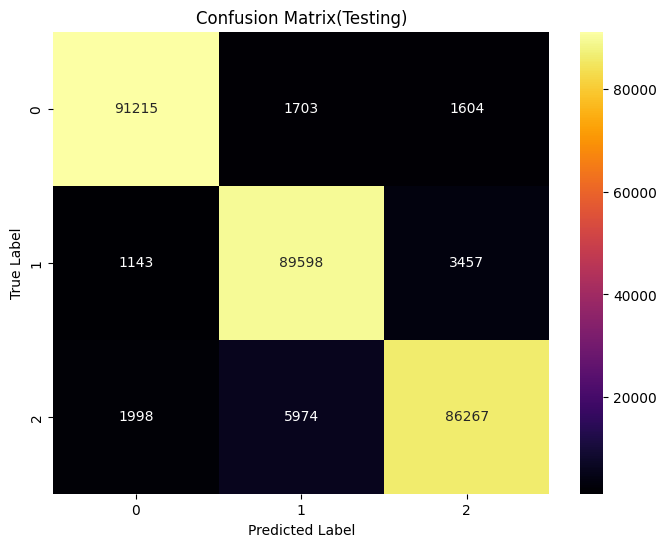

In [48]:
# Assuming you have already trained your model and have Flwmterytst and y_pred
# Calculate , confusion matrix
cm = confusion_matrix(Flwmterytst, y_pred)

# Plot , confusion matrix as a heatmap
ptlt.figure(figsize=(8, 6))
sbns.heatmap(cm, annot=True, fmt='d', cmap='inferno',
            xticklabels=rf_classifier.classes_,
            yticklabels=rf_classifier.classes_)
#ploteing Tittle
ptlt.title('Confusion Matrix(Testing)')
#ploteing Xlbel
ptlt.xlabel('Predicted Label')
#ploteing Ylbel
ptlt.ylabel('True Label')
#displayng grph
ptlt.show()

##Roc curve

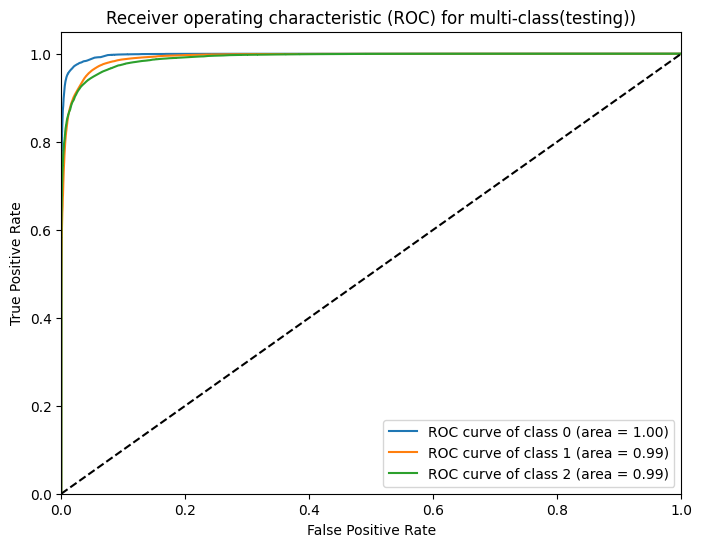

In [49]:
# Convert , multi-class true labels (Flwmterytrn) to binary format, with each class having its own column.
Flwmterytrn_bin = label_binarize(Flwmterytst, classes=list(rf_classifier.classes_))  # replace rf_classifier with your model name if different

# Determine , number of unique classes using , geometry of , binarized label array.
n_classes = Flwmterytrn_bin.shape[1]

# Set up dictionaries to record , false positive rate (FPR), true positive rate (TPR), and AUC values for each class.
fpr = dict()
tpr = dict()
roc_auc = dict()

# Get predicted probabilities for the test set using the trained model
y_pred_proba_test = rf_classifier.predict_proba(Flwmterxtst) # Get probabilities for the test set

# Loop over every class index:
for i in range(n_classes):
    # Calculate , FPR and TPR for , current class by comparing binarized true labels to predicted probabilities.
    # Use y_pred_proba_test instead of y_pred_proba here
    fpr[i], tpr[i], _ = roc_curve(Flwmterytrn_bin[:, i], y_pred_proba_test[:, i])

    # Calculate , current class's AUC score using , FPR and TPR data.
    roc_auc[i] = auc(fpr[i], tpr[i])

# To calculate , micro-average ROC curve, flatten all true and forecasted values.
# Use y_pred_proba_test instead of y_pred_proba here as well
fpr["micro"], tpr["micro"], _ = roc_curve(Flwmterytrn_bin.ravel(), y_pred_proba_test.ravel())

# Calculate , micro-average AUC score by combining , FPR and TPR.
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Make a new figure with a given size to plot , ROC curves.
ptlt.figure(figsize=(8, 6))

# Loop through , classes to:
for i in range(n_classes):
    # Plot , ROC curve for , current class, labeled with its name and AUC score.
    ptlt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(rf_classifier.classes_[i], roc_auc[i]))

# To show random guessing, draw a diagonal dashed line as a baseline.
ptlt.plot([0, 1], [0, 1], 'k--')

# To ensure accurate scale, set , x-axis boundaries from 0 to 1.
ptlt.xlim([0.0, 1.0])

# To allow curve peaks, set , y-axis limits between 0 and slightly above 1.
ptlt.ylim([0.0, 1.05])

# Label , x-axis "False Positive Rate".
ptlt.xlabel('False Positive Rate')

# Label , y-axis "True Positive Rate".
ptlt.ylabel('True Positive Rate')

# Include a plot title to highlight that , chart represents a multi-class ROC analysis.
ptlt.title('Receiver operating characteristic (ROC) for multi-class(testing))')

# Use , legend in , lower right corner to identify each class's curve.
ptlt.legend(loc="lower right")

# createing , final plot with , ROC curves for all classes.
ptlt.show()

##Comparision Graph

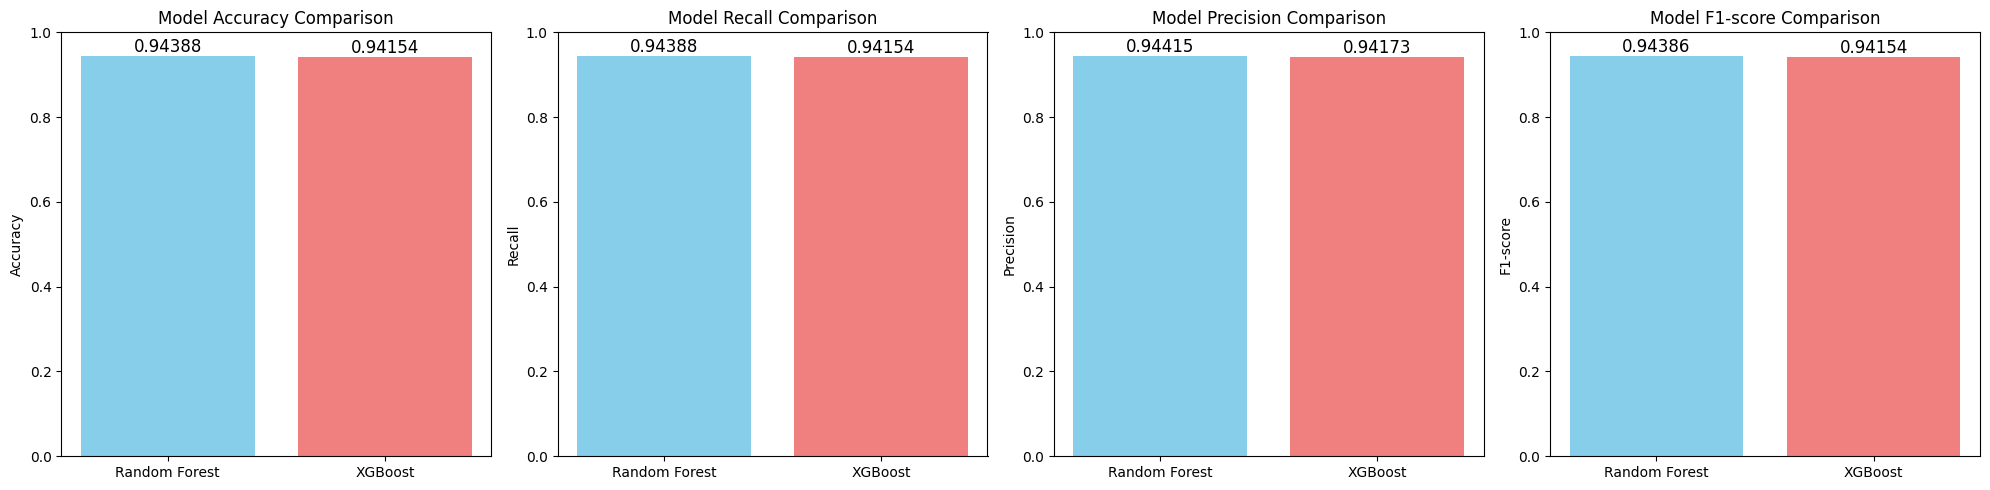

In [59]:
# Creating a list of model names to use as labels in plots.
models = ['Random Forest', 'XGBoost']

# Calculate Random Forest model's accuracy score using both actual ('Flwmterytst') and predicted ('y_pred') labels.
accuracy_rf = accuracy_score(Flwmterytst, y_pred)  # Assuming Flwmterytst and y_pred are defined

# Generate a list of accuracy values for both models, rounding to five decimal places.
accuracy = [round(accuracy_rf, 5), round(accuracy_xgb, 5)]

# Compute weighted average precision scores for each model and save them in a list.
precision = [round(precision_score(Flwmterytst, y_pred, average='weighted'), 5),
             round(precision_score(Flwmterytst, y_pred_xgb, average='weighted'), 5)]

# Compute weighted average F1-scores for both models and keep them in a list.
f1 = [round(f1_score(Flwmterytst, y_pred, average='weighted'), 5),
      round(f1_score(Flwmterytst, y_pred_xgb, average='weighted'), 5)]

# Compute weighted average recall scores for each model and save them in a list.
recall = [round(recall_score(Flwmterytst, y_pred, average='weighted'), 5),
          round(recall_score(Flwmterytst, y_pred_xgb, average='weighted'), 5)]

# Creating an array of places on the x-axis equal to the number of models for plotting.
x = nmpy.arange(len(models))

# Creating a figure with 1 row and 4 subplots arranged horizontally, each with a width of 5 units.
fig, axes = ptlt.subplots(1, 4, figsize=(20, 5))  # <--- Changed 3 to 4

# Save the calculated metric values (accuracy, recall, precision, and F1-score) in a list for future iteration.
metrics = [accuracy, recall, precision, f1]  # <--- Added recall in the correct order

# Creating names for each subplot that describe what is being compared.
titles = ['Model Accuracy Comparison', 'Model Recall Comparison', 'Model Precision Comparison', 'Model F1-score Comparison']  # <--- Updated titles

# Creating a list of y-axis labels for each subplot to identify the metric being displayed.
y_labels = ['Accuracy', 'Recall', 'Precision', 'F1-score']  # <--- Updated labels

# Define the colors for the plot bars.
colors = ['skyblue', 'lightcoral']

# Loop through each subplot using enumeration to manage the axes and accompanying metrics.
for i, ax in enumerate(axes):
    # Creating a bar chart for the current statistic with defined colors.
    bars = ax.bar(x, metrics[i], color=colors)

    # Set the x-axis tick positions using the model indices.
    ax.set_xticks(x)

    # Identify the x-axis with model names.
    ax.set_xticklabels(models)

    # Set the y-axis label for the current subplot using the corresponding metric.
    ax.set_ylabel(y_labels[i])

    # Use the preconfigured list to specify the title of the current subplot.
    ax.set_title(titles[i])

    # To show slight changes between models, limit the y-axis range to 0-1.
    ax.set_ylim(0, 1)

    # Loop through each bar in the bar chart and annotate the height value above it.
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.5f}', ha='center', va='bottom', fontsize=12)

# Adjusting subplot spacing for improved look.
ptlt.tight_layout()

# Display final plot with all four subplots.
ptlt.show()